In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
plt.rcParams['savefig.dpi'] = 150 #图片像素
plt.rcParams['figure.dpi'] = 150 #分辨率
%matplotlib inline

In [2]:
data_bbu = pd.read_csv('data-bbu.csv', header=None)
data_gps = pd.read_csv('data-gps.csv', header=None)
data_bbu = data_bbu[2]
data_gps = data_gps[2]
TE_bbu = pd.array(data_bbu)
TE_gps = pd.array(data_gps)
TE_bbu = TE_bbu - np.average(TE_bbu)
TE_gps = TE_gps - np.average(TE_gps)
print(np.shape(TE_bbu))
print(np.shape(TE_gps))

(90285,)
(38342,)


In [3]:
span = 784
TE_bbu = np.array(TE_bbu)
TE_gps = np.array(TE_gps)
col_1 = len(TE_bbu)//span
col_2 = len(TE_gps)//span
TE_bbu = np.reshape(TE_bbu[:col_1*span],(col_1,span))
TE_gps = np.reshape(TE_gps[:col_2*span],(col_2,span))

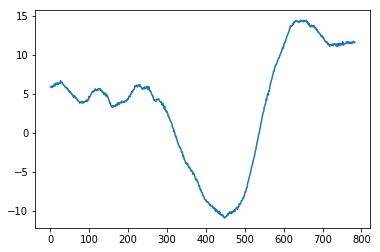

In [5]:
plt.plot(TE_bbu[25])

In [6]:
print(np.shape(TE_gps))

(48, 784)


In [7]:
data_bbu2 = pd.read_csv('data1.csv', header=None)
data_gps2 = pd.read_csv('data2.csv', header=None)
data_bbu2 = data_bbu2[2]
data_gps2 = data_gps2[2]
TE_bbu2 = pd.array(data_bbu2)
TE_gps2 = pd.array(data_gps2)
TE_bbu2 = TE_bbu2 - np.average(TE_bbu2)
TE_gps2 = TE_gps2 - np.average(TE_gps2)
print(np.shape(TE_bbu2))
print(np.shape(TE_gps2))

(98381,)
(162376,)


In [8]:
span = 784
TE_bbu2 = np.array(TE_bbu2)
TE_gps2 = np.array(TE_gps2)
col_11 = len(TE_bbu2)//span
col_22 = len(TE_gps2)//span
TE_bbu2 = np.reshape(TE_bbu2[:col_11*span],(col_11,span))
TE_gps2 = np.reshape(TE_gps2[:col_22*span],(col_22,span))

In [9]:
print(np.shape(TE_bbu2))
print(np.shape(TE_gps2))

(125, 784)
(207, 784)


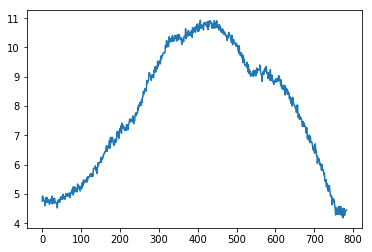

In [10]:
plt.plot(TE_gps2[203])

In [11]:
normal_datas = np.concatenate((TE_bbu,TE_gps))

In [12]:
normal_datas = np.concatenate((TE_bbu2,normal_datas))
normal_datas = np.concatenate((TE_gps2,normal_datas))
np.shape(normal_datas)

(495, 784)

In [13]:
normal_datas_ratio1 = normal_datas * 1.3
normal_datas_ratio2 = normal_datas * (-0.87)

In [14]:
normal_data_012 = np.concatenate((normal_datas,normal_datas_ratio1))
normal_data_012 = np.concatenate((normal_data_012,normal_datas_ratio2))
np.shape(normal_data_012)

(1485, 784)

In [15]:
normal_data_4 = normal_data_012 + np.random.random((1485,784))*1.8

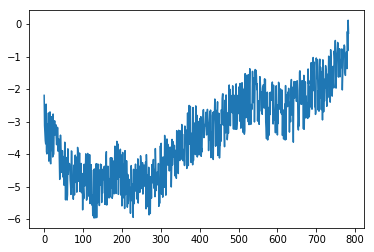

In [16]:
plt.plot(normal_data_4[103])

In [17]:
normal_data_0124 = np.concatenate((normal_data_4,normal_data_012))
np.shape(normal_data_0124)

(2970, 784)

In [18]:
normal_data_5 = (normal_data_0124 + np.mean(normal_data_0124))*2.0

In [19]:
normal_data_01245 = np.concatenate((normal_data_5,normal_data_0124))
np.shape(normal_data_01245)

(5940, 784)

In [20]:
def tie_gen(N1, N2, N3):
    mu = N1
    sigma = N2
    num = N3
    rand_data = np.random.normal(mu, sigma, num)
    return rand_data

# jump
def jump_noise_gen(N):
    jump_num = np.random.randint(8,20)
    jump_inx = np.random.randint(1,N,size=jump_num)
    jump_noise = np.random.randn(N)
    for k in range(jump_num):
        jump_noise[jump_inx[k]] = 2 *np.random.randint(1,8)
    return jump_noise

def discontinue_gen_mode1():
    N1 = np.random.randint(1,5)
    N2 = np.random.randint(1,7)
    N3 = np.random.randint(1,700)
    rand_data1 = tie_gen(N1, N2, N3)
    N4 = np.random.randint(1,3)
    N5 = np.random.randint(1,9)
    N6 = 784 - N3
    rand_data2 = tie_gen(N4, N5, N6)
    discontinue_gen = np.random.randn(rand_data1.size+rand_data2.size)
    discontinue_gen[1:rand_data1.size] = rand_data1[1:rand_data1.size]
    discontinue_gen[rand_data1.size+1:rand_data1.size+rand_data2.size] = rand_data2[1:rand_data2.size] + np.random.randint(20,35)
    return discontinue_gen

def discontinue_gen_mode2():
    N1 = np.random.randint(1,6)
    N2 = np.random.randint(1,8)
    N3 = np.random.randint(1,100)
    rand_data1 = tie_gen(N1, N2, N3)
    N4 = np.random.randint(1,10)
    N5 = np.random.randint(1,6)
    N6 = np.random.randint(100,500) 
    rand_data2 = tie_gen(N4, N5, N6)
    N7 = np.random.randint(1,5)
    N8 = np.random.randint(1,7)
    N9 = 784 - N3 - N6
    rand_data3 = tie_gen(N7, N8, N9) 
    discontinue_gen = np.random.randn(rand_data1.size+rand_data2.size+rand_data3.size)
    discontinue_gen[1:rand_data1.size] = rand_data1[1:rand_data1.size]
    discontinue_gen[rand_data1.size+1:rand_data1.size+rand_data2.size] = rand_data2[1:rand_data2.size] + np.random.randint(20,40)
    discontinue_gen[rand_data1.size+rand_data2.size+1:rand_data1.size+rand_data2.size+rand_data3.size]= rand_data3[1:rand_data3.size]
    return discontinue_gen

def holdover_gen(N):
    x = np.linspace(1,N,N,dtype='float')
    a = 0.2 * np.random.rand() - 4
    b = 20 * np.random.rand() - 5
    c = 4 * np.random.rand()
    y = a*x**2 + b*x +c
    return y * 1e-5

In [21]:
data_x_jump = np.zeros((1000,784))
for k in range(1000):
    data_x_jump[k] = jump_noise_gen(784)
data_x_dis1 = np.zeros((1500,784))
for k in range(1000):
    data_x_dis1[k] = discontinue_gen_mode1()
data_x_dis2 = np.zeros((1500,784))
for k in range(1000):
    data_x_dis2[k] = discontinue_gen_mode2()
data_x_hd = np.zeros((1000,784))
#for k in range(1000):
#    data_x_hd[k] = holdover_gen(784)

tp1 = np.concatenate((data_x_jump,data_x_dis1))
tp2 = np.concatenate((tp1,data_x_dis2))
#tp3 = np.concatenate((tp2,data_x_hd))
#tp4 = -0.85 * tp3
#tp5 = np.concatenate((tp3, tp4))

np.shape(tp2)
data_abnormal = tp2

In [24]:
print(np.shape(tp2))

(4000, 784)


In [25]:
a = pd.read_csv('wander2.csv',header=None)
data = a[2]
tie = pd.array(data)
tie2 = np.array(tie)
a = pd.read_csv('wander1.csv',header=None)
data = a[2]
tie = pd.array(data)
tie1 = np.array(tie)

In [26]:
span = 784
col_3 = len(tie1)//span
col_4 = len(tie2)//span
tie1 = np.reshape(tie1[:col_3*span],(col_3,span))*50.0
tie2 = np.reshape(tie2[:col_4*span],(col_4,span))*40.0

In [27]:
tie12 = np.concatenate((tie1, tie2))
tie3 = np.concatenate((tie12, tie12*(-0.89)))
np.shape(tie3)

(3060, 784)

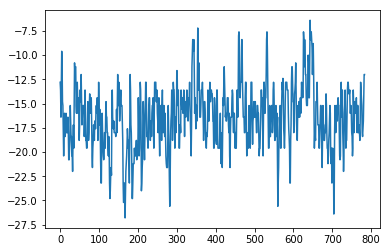

In [28]:
plt.plot(tie3[1450])

In [29]:
np.mean(tie3)

-0.6461238482893147

In [26]:
normal_datas = normal_data_01245
print(np.shape(normal_datas))
print(np.shape(data_abnormal))

(5940, 784)
(4000, 784)


In [27]:
datasets = np.concatenate((normal_datas,data_abnormal))
np.shape(datasets)

(9940, 784)

In [28]:
label_normal = np.ones(len(normal_datas)) 
label_abnormal = np.zeros(len(data_abnormal))
labels = np.concatenate((label_normal,label_abnormal))

In [29]:
np.savetxt('sync_detection_data_new.txt',datasets)
np.savetxt('sync_detection_label_new.txt',labels)

In [34]:
aa = np.loadtxt('sync_detection_data_new.txt')
np.shape(aa)

(14030, 784)

In [35]:
bb = np.loadtxt('sync_detection_label_new.txt')
np.shape(bb)

(14030,)